FLight Data Analysis using ML

In [14]:
# load the dataset
from google.colab import files
uploaded = files.upload()


Saving flights.csv to flights (1).csv


In [ ]:
#read the data

import pandas as pd
import numpy as np

df = pd.read_csv("flights.csv")


In [ ]:
#show the datatype and missing values if any
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688099 entries, 0 to 688098
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   YEAR           688099 non-null  int64              
 1   MONTH_NUM      688099 non-null  int64              
 2   MONTH_MON      688099 non-null  object             
 3   FLT_DATE       688099 non-null  datetime64[ns, UTC]
 4   APT_ICAO       688099 non-null  object             
 5   APT_NAME       688099 non-null  object             
 6   STATE_NAME     688099 non-null  object             
 7   FLT_DEP_1      688099 non-null  int64              
 8   FLT_ARR_1      688099 non-null  int64              
 9   FLT_TOT_1      688099 non-null  int64              
 10  FLT_DEP_IFR_2  208314 non-null  float64            
 11  FLT_ARR_IFR_2  208314 non-null  float64            
 12  FLT_TOT_IFR_2  208314 non-null  float64            
 13  Pivot Label    688099 non-nul

In [18]:
#rows and column
df.shape


(688099, 14)

In [19]:
df.describe(include='all')


,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2,Pivot Label
count,688099.000000,688099.000000,688099,688099,688099,688099,688099,688099.000000,688099.000000,688099.000000,208314.000000,208314.000000,208314.000000,688099
unique,NaN,NaN,12,NaN,332,333,42,NaN,NaN,NaN,NaN,NaN,NaN,333
top,NaN,NaN,JAN,NaN,UGTB,Tbilisi,France,NaN,NaN,NaN,NaN,NaN,NaN,Tbilisi (UGTB)
freq,NaN,NaN,63638,NaN,2343,2343,138694,NaN,NaN,NaN,NaN,NaN,NaN,2343
mean,2018.823684,6.301461,NaN,2019-04-22 03:40:44.922024448+00:00,NaN,NaN,NaN,63.238884,63.278576,126.517460,143.703097,143.610530,287.313628,NaN
min,2016.000000,1.000000,NaN,2016-01-01 00:00:00+00:00,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2017.000000,3.000000,NaN,2017-10-12 00:00:00+00:00,NaN,NaN,NaN,5.000000,5.000000,10.000000,38.000000,38.000000,76.000000,NaN
50%,2019.000000,6.000000,NaN,2019-05-01 00:00:00+00:00,NaN,NaN,NaN,17.000000,17.000000,35.000000,91.000000,91.000000,182.000000,NaN
75%,2020.000000,9.000000,NaN,2020-11-22 00:00:00+00:00,NaN,NaN,NaN,71.000000,71.000000,141.000000,195.000000,195.000000,390.000000,NaN
max,2022.000000,12.000000,NaN,2022-05-31 00:00:00+00:00,NaN,NaN,NaN,847.000000,813.000000,1628.000000,1039.000000,817.000000,1624.000000,NaN


In [ ]:
#check for missing value
df.isna().sum()


,0
YEAR,0
MONTH_NUM,0
MONTH_MON,0
FLT_DATE,0
APT_ICAO,0
APT_NAME,0
STATE_NAME,0
FLT_DEP_1,0
FLT_ARR_1,0
FLT_TOT_1,0


In [23]:
#airport counts
df['APT_ICAO'].nunique()

332

In [24]:
df['STATE_NAME'].nunique()

42

Introduction

Expolatory data Analysis:

**IFR = Instrument Flight Rules**

Not all airports fly IFR flights daily (especially small airports), and sometimes countries simply do not report IFR traffic.

if IFR missing → treat as 0

In [27]:
#Handling IFR Missing Values

# if IFR = 0, missing data
df[['FLT_DEP_IFR_2','FLT_ARR_IFR_2','FLT_TOT_IFR_2']] = (
    df[['FLT_DEP_IFR_2','FLT_ARR_IFR_2','FLT_TOT_IFR_2']].fillna(0)
)

#keep data type as 'int'
df[['FLT_DEP_IFR_2','FLT_ARR_IFR_2','FLT_TOT_IFR_2']] = (
    df[['FLT_DEP_IFR_2','FLT_ARR_IFR_2','FLT_TOT_IFR_2']].astype(int)
)


In [28]:
#check if the missing data is filled correctly

df.isna().sum()


,0
YEAR,0
MONTH_NUM,0
MONTH_MON,0
FLT_DATE,0
APT_ICAO,0
APT_NAME,0
STATE_NAME,0
FLT_DEP_1,0
FLT_ARR_1,0
FLT_TOT_1,0


In [30]:
#airport codes by ICAO
df['APT_ICAO'].unique()

array(['EBAW', 'EBBR', 'EBCI', 'EBLG', 'EBOS', 'EDDB', 'EDDC', 'EDDE',
       'EDDF', 'EDDG', 'EDDH', 'EDDK', 'EDDL', 'EDDM', 'EDDN', 'EDDP',
       'EDDR', 'EDDS', 'EDDT', 'EDDV', 'EDDW', 'EETN', 'EETU', 'EFHK',
       'EGAA', 'EGAC', 'EGAE', 'EGBB', 'EGCC', 'EGGD', 'EGGW', 'EGHI',
       'EGKB', 'EGKK', 'EGLC', 'EGLF', 'EGLL', 'EGNX', 'EGPD', 'EGPF',
       'EGPH', 'EGSS', 'EHAM', 'EHBK', 'EHGG', 'EHRD', 'EICK', 'EIDL',
       'EIDW', 'EIKN', 'EIKY', 'EINN', 'EIWF', 'EKCH', 'ELLX', 'ENBR',
       'ENGM', 'ENHD', 'ENVA', 'ENZV', 'EPBY', 'EPGD', 'EPKK', 'EPKT',
       'EPLB', 'EPLL', 'EPMO', 'EPPO', 'EPRZ', 'EPSC', 'EPWA', 'EPWR',
       'ESGG', 'ESSA', 'ESSB', 'EVRA', 'EYKA', 'EYPA', 'EYSA', 'EYVI',
       'GCFV', 'GCGM', 'GCHI', 'GCLA', 'GCLP', 'GCRR', 'GCTS', 'GCXO',
       'GEML', 'LATI', 'LBSF', 'LCLK', 'LCPH', 'LDZA', 'LEAL', 'LEAM',
       'LEAS', 'LEBB', 'LEBL', 'LECO', 'LEDA', 'LEGE', 'LEGR', 'LEIB',
       'LEJR', 'LELC', 'LELL', 'LEMD', 'LEMG', 'LEMH', 'LEPA', 'LEPP',
      

In [32]:
#airport name and its count
df['APT_NAME'].value_counts()

,count
APT_NAME,
Tbilisi,2343
Belgrade - Nikola Tesla,2343
Zürich,2343
Ankara - Esenboğa,2343
Geneva,2343
...,...
Valencia - Requena,456
Ciudad Real Central,366
Sligo,223


In [34]:
#Country names-airport
df['STATE_NAME'].value_counts()

,count
STATE_NAME,
France,138694
Spain,110164
Norway,70174
United Kingdom,43504
Germany,36774
Poland,32230
Italy,30400
Greece,29041
Portugal,23795


<Axes: title={'center': 'Total Daily Flights in Europe'}, xlabel='FLT_DATE'>

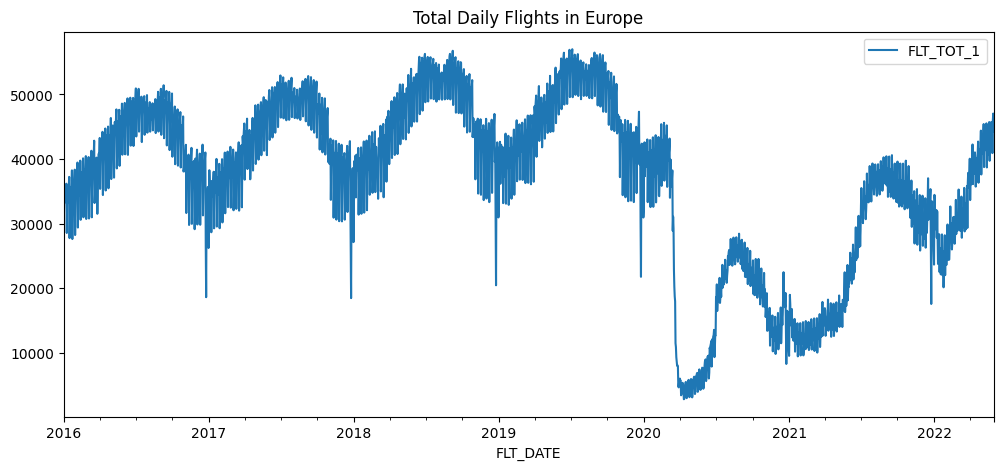

In [36]:
# whats the Daily Flight Trends?

df_daily = df.groupby('FLT_DATE')['FLT_TOT_1'].sum().reset_index()

#lets visualize daily trends
df_daily.plot(x='FLT_DATE', y='FLT_TOT_1', figsize=(12,5), title="Total Daily Flights in Europe")

<Axes: title={'center': 'Flights by Country (Top 15)'}, xlabel='STATE_NAME'>

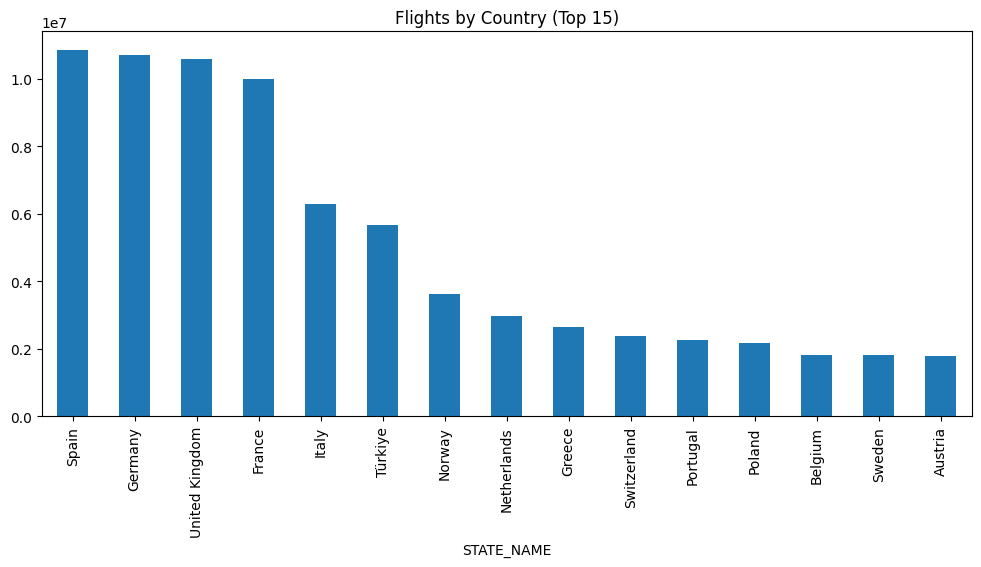

In [39]:
# Flight traffic based on EU country

country_flights = df.groupby('STATE_NAME')['FLT_TOT_1'].sum().sort_values(ascending=False)
country_flights.head(15).plot(kind='bar', figsize=(12,5), title="Flights by Country (Top 15)")


<Axes: title={'center': 'Distribution of IFR Ratio Across Airports'}, ylabel='Frequency'>

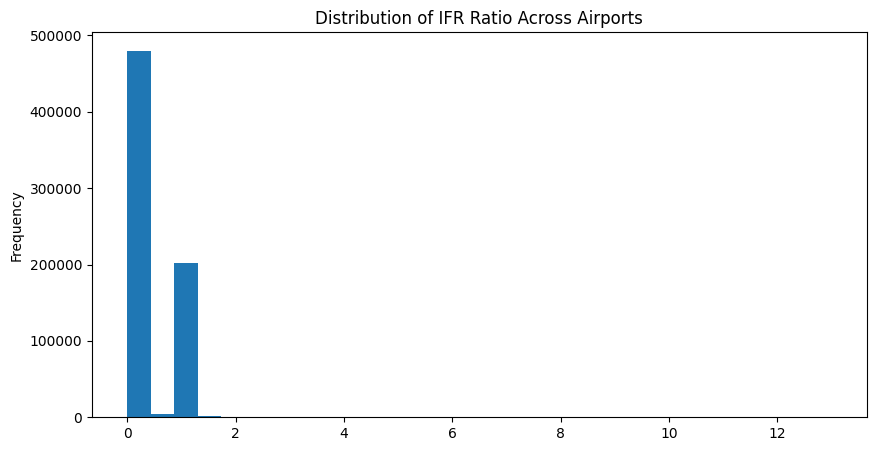

In [41]:
#Which airports rely more on IFR operations?
import numpy as np
df['IFR_ratio'] = np.where(df['FLT_TOT_1'] == 0, 0, df['FLT_TOT_IFR_2'] / df['FLT_TOT_1'])

df['IFR_ratio'].plot(kind='hist', bins=30, figsize=(10,5),
                    title="Distribution of IFR Ratio Across Airports")

<Axes: title={'center': 'Average Flights Per Month'}, xlabel='MONTH_NUM'>

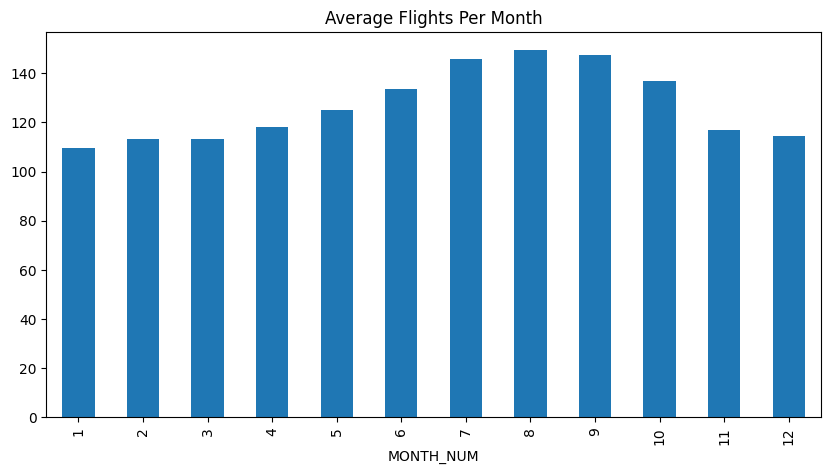

In [42]:
#sesonal trends in flight operation

monthly = df.groupby('MONTH_NUM')['FLT_TOT_1'].mean()
monthly.plot(kind='bar', figsize=(10,5), title="Average Flights Per Month")


This aids in interpreting aviation flight operation on weather conditions:

VFR = Visual Flight Rules
These are flights where pilots navigate using visual references (looking outside), not relying heavily on instruments or air traffic control.

If weather becomes poor:
*   VFR flights get cancelled
*   Traffic drops

IFR airports continue operations even in:

* Fog
* Low visibility
* Rain
* Snow

Northern Europe = more weather challenges → highly depended on IFR

Southern Europe = more VFR traffic (good weather)

In [69]:
#which airports rely most on IFR operations?
airport_ifr = df.groupby('Pivot Label')['IFR_ratio'].mean().sort_values(ascending=False)
airport_ifr.head(15)

,IFR_ratio
Pivot Label,
Malta (LMML),1.060020
Bremen (EDDW),1.048474
Tallinn (EETN),1.022108
Helsinki - Vantaa (EFHK),1.015932
Brussels (EBBR),1.013656
Ljubljana (LJLJ),1.011183
Edinburgh (EGPH),0.999473
Dublin (EIDW),0.999341
Rome - Fiumicino (LIRF),0.999174


<Axes: title={'center': 'Top 15 Airports by IFR Dependency'}, xlabel='Pivot Label'>

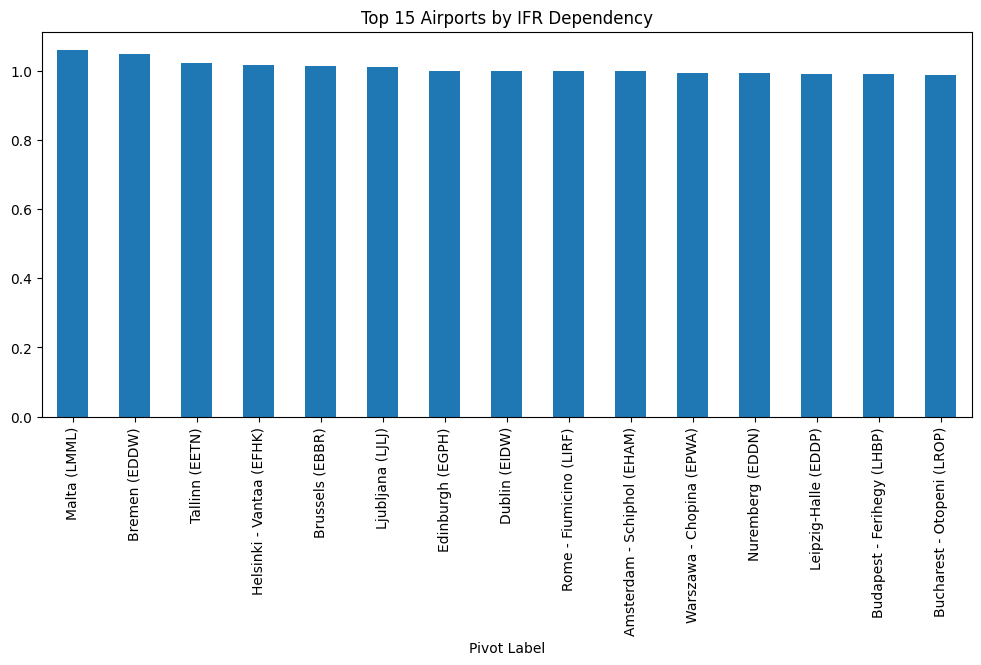

In [70]:
airport_ifr.head(15).plot(kind='bar', figsize=(12,5),
                          title="Top 15 Airports by IFR Dependency")


<Axes: title={'center': 'Average IFR Ratio by Country'}, xlabel='STATE_NAME'>

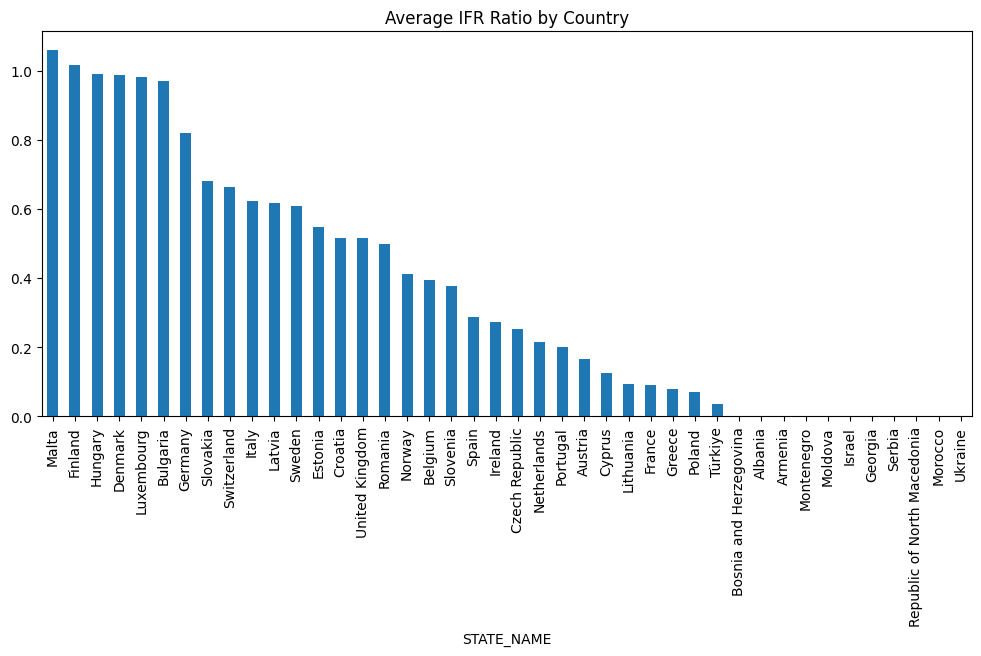

In [46]:
#which EU country relays on IFR

country_ifr = df.groupby('STATE_NAME')['IFR_ratio'].mean().sort_values(ascending=False)

country_ifr.plot(kind='bar', figsize=(12,5),
                 title="Average IFR Ratio by Country")


In [51]:
# which airport has top IFR usage
top_ifr = df.groupby(['APT_ICAO','APT_NAME'])['IFR_ratio'].mean()\
            .sort_values(ascending=False).head(10)

for icao, val in top_ifr.items():
    print(f"{icao[0]} ({icao[1]}): {val:.2f}")

LMML (Malta): 1.06
EDDW (Bremen): 1.05
EETN (Tallinn): 1.02
EFHK (Helsinki - Vantaa): 1.02
EBBR (Brussels): 1.01
LJLJ (Ljubljana): 1.01
EGPH (Edinburgh): 1.00
EIDW (Dublin): 1.00
LIRF (Rome - Fiumicino): 1.00
EHAM (Amsterdam - Schiphol): 1.00


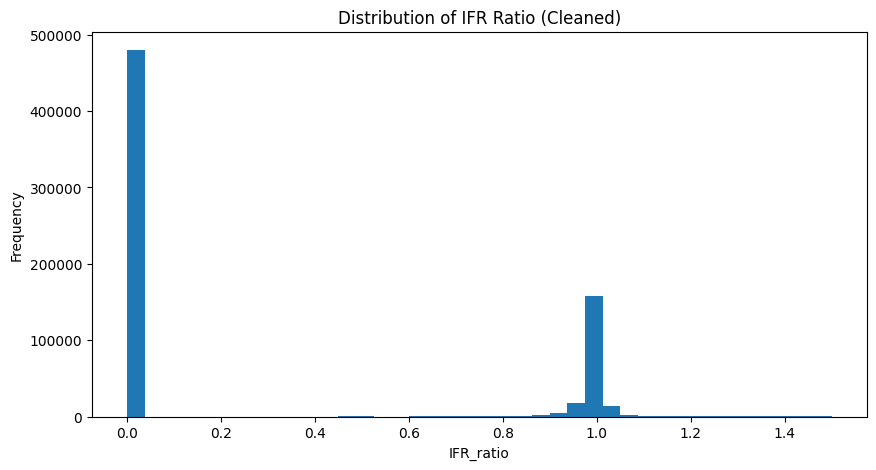

In [52]:
import matplotlib.pyplot as plt

# Remove extreme ratios
df_clean = df[df['IFR_ratio'] <= 1.5]

plt.figure(figsize=(10,5))
df_clean['IFR_ratio'].plot(kind='hist', bins=40)
plt.title("Distribution of IFR Ratio (Cleaned)")
plt.xlabel("IFR_ratio")
plt.ylabel("Frequency")
plt.show()


In [71]:
# Which airports have the MOST traffic?
df.groupby('APT_NAME')['FLT_TOT_1'].sum().sort_values(ascending=False).head(20)


,FLT_TOT_1
APT_NAME,
Amsterdam - Schiphol,2694025
Paris-Charles-de-Gaulle,2581673
Frankfurt,2581524
London - Heathrow,2446474
Madrid - Barajas,2117063
Munich,2013524
Barcelona,1699766
Istanbul Atatürk,1570488
Rome - Fiumicino,1518100


In [74]:
#low traffic
df.groupby(['APT_ICAO', 'APT_NAME'])['FLT_TOT_1'].sum().sort_values().head(20)

,,FLT_TOT_1
APT_ICAO,APT_NAME,
EVJA,Tukums Jurmala,26
EVVA,Ventspils,82
EISG,Sligo,323
LERL,Ciudad Real Central,773
LPMT,Montijo,988
LERE,Valencia - Requena,1076
LEIZ,Abad,1396
LESJ,Palma - Son San Juan,1472
LEBA,Cordoba,1970


In [75]:
#when is the peak traffic observed at airport

df.groupby(['APT_ICAO', 'APT_NAME','MONTH_NUM'])['FLT_TOT_1'].mean()



APT_ICAO  APT_NAME         MONTH_NUM
EBAW      Antwerp          1             29.259259
                           2             36.040404
                           3             37.797235
                           4             37.608696
                           5             39.611111
                                           ...    
UKBB      Kiev - Boryspil  8            270.822581
                           9            274.744444
                           10           245.688172
                           11           215.416667
                           12           208.424731
Name: FLT_TOT_1, Length: 3990, dtype: float64

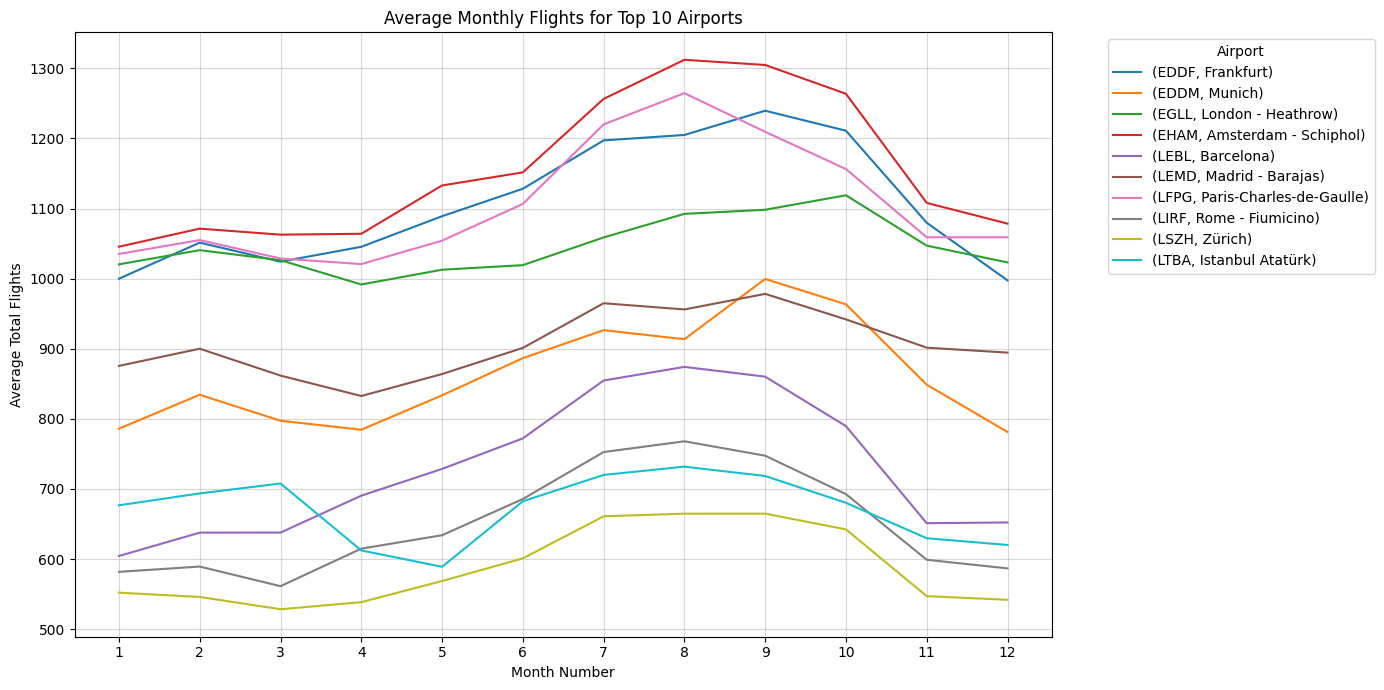

In [97]:
import matplotlib.pyplot as plt

# Calculate the grouped mean
airport_monthly_avg = df.groupby(['APT_ICAO', 'APT_NAME', 'MONTH_NUM'])['FLT_TOT_1'].mean()

# Identify top 10 airports by overall total flights for a clearer visualization
top_10_airports = df.groupby(['APT_ICAO','APT_NAME'])['FLT_TOT_1'].sum().nlargest(10).index

# Filter the grouped data for these top 10 airports using .isin() for MultiIndex compatibility
mask = airport_monthly_avg.index.isin(top_10_airports)
top_airport_monthly_avg = airport_monthly_avg[mask]

# Unstack to get months as columns,
top_airport_monthly_pivot = top_airport_monthly_avg.unstack(level='MONTH_NUM')

# Plotting the average monthly flights for the top 10 airports
plt.figure(figsize=(14, 7))
top_airport_monthly_pivot.T.plot(kind='line', ax=plt.gca())
plt.title('Average Monthly Flights for Top 10 Airports')
plt.xlabel('Month Number')
plt.ylabel('Average Total Flights')
plt.xticks(range(1, 13))  # Ensure all month numbers are shown on the x-axis
plt.legend(title='Airport', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

#print(f"Plotting monthly flight trends for the following top 10 airports: {list(top_10_airports)}")

**Build Airport capacity prediction model using ML**

---

Based on EDA, the data consit of Airport Traffic from EU Airpots. this includes date, year, month, airport code, total flights per day, IFR flights per day.

With this information, we can build a airport capacity model to understand how many glights an airport can haldel. Thus this dataset helps to understand the following:
* capture large-scale aviation behavior
* learn patterns from busiest airports
* understand the effect of time (seasonality)
* the effect of IFR operations

Thus regrestion modelling is used.
This modeling can help with operational planning staffing, runway usage and understand the peak travel behaviours to maximize airport capacity.

As the dataset targets the numerical traffic volumes, it does not classify the flights data into high, low or medium, predicting the data based on classification would lose the valuable information. Hence Regression model support the overall analysis.






In [117]:
#import basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#ML tools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#date-time
from datetime import timedelta


In [256]:
#Remove noise from small airport for stable traffic, reliable operation and real aviation pattern.

df['FLT_DATE'] = pd.to_datetime(df['FLT_DATE'], utc=True)


# # total traffic per airport
# airport_totals = df.groupby('APT_ICAO')['FLT_TOT_1'].sum().sort_values(ascending=False)

# #sort airport from high traffic to low traffic
# airport_totals = airport_totals.sort_values(ascending=False)

# #from this select top 50 airport for easy traffic understanding : busiest airport
# top_airports = airport_totals.head(50).index

# #top airport data
# df_reg = df[df['APT_ICAO'].isin(top_airports)].copy()


In [257]:
#date-time

df_reg['YEAR'] = df_reg['FLT_DATE'].dt.year
df_reg['MONTH'] = df_reg['FLT_DATE'].dt.month
df_reg['DAYOFWEEK'] = df_reg['FLT_DATE'].dt.dayofweek
df_reg['IS_WEEKEND'] = df_reg['DAYOFWEEK'].isin([5,6]).astype(int)

df_reg = df_reg.sort_values(['APT_ICAO','FLT_DATE'])

df_reg['lag_1']  = df_reg.groupby('APT_ICAO')['FLT_TOT_1'].shift(1)
df_reg['lag_7']  = df_reg.groupby('APT_ICAO')['FLT_TOT_1'].shift(7)
df_reg['lag_30'] = df_reg.groupby('APT_ICAO')['FLT_TOT_1'].shift(30)

df_reg = df_reg.dropna(subset=['lag_1','lag_7','lag_30'])


In [258]:


# Select top 50 busiest airports
airport_totals = df.groupby('APT_ICAO')['FLT_TOT_1'].sum().sort_values(ascending=False)
top_airports = airport_totals.head(50).index

df_reg = df[df['APT_ICAO'].isin(top_airports)].copy()

# Create date/time features
df_reg['YEAR'] = df_reg['FLT_DATE'].dt.year
df_reg['MONTH'] = df_reg['FLT_DATE'].dt.month
df_reg['DAYOFWEEK'] = df_reg['FLT_DATE'].dt.dayofweek
df_reg['IS_WEEKEND'] = df_reg['DAYOFWEEK'].isin([5,6]).astype(int)

# FIXED feature set (no leakage)
feature_cols = [
    'YEAR', 'MONTH', 'DAYOFWEEK', 'IS_WEEKEND',
    'IFR_ratio',
    'APT_ICAO', 'APT_NAME', 'STATE_NAME'
]

X = df_reg[feature_cols].copy()
y = df_reg['FLT_TOT_1'].copy()

# Encode categorical features
X_encoded = pd.get_dummies(
    X,
    columns=['APT_ICAO', 'APT_NAME', 'STATE_NAME'],
    drop_first=True
)

# Train/test split
split_date = pd.Timestamp('2021-01-01', tz='UTC')
train_mask = df_reg['FLT_DATE'] < split_date
test_mask  = df_reg['FLT_DATE'] >= split_date

X_train = X_encoded[train_mask]
X_test = X_encoded[test_mask]
y_train = y[train_mask]
y_test = y[test_mask]




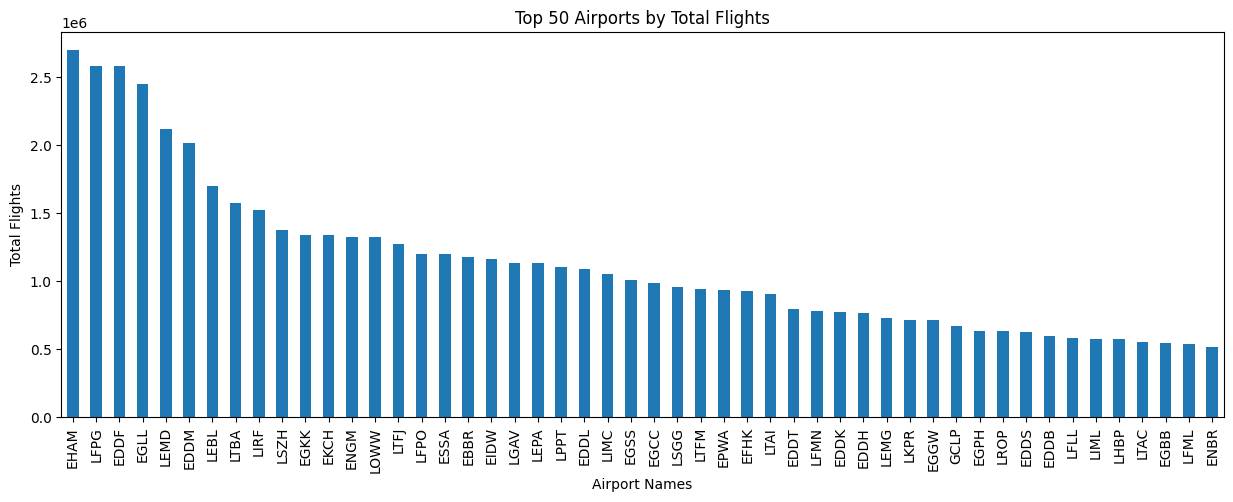

In [259]:
#top 50 airports

plt.figure(figsize=(15,5))
airport_totals.head(50).plot(kind='bar',
                             title="Top 50 Airports by Total Flights",
                             ylabel="Total Flights",
                             xlabel="Airport Names")
plt.show()

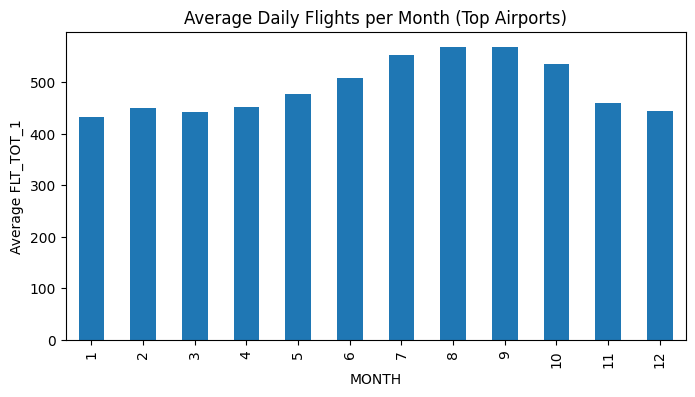

In [260]:
#to understand sesonalities, weekly pattern, yearly observation

df_reg['YEAR'] = df_reg['FLT_DATE'].dt.year
df_reg['MONTH'] = df_reg['FLT_DATE'].dt.month
df_reg['DAYOFWEEK'] = df_reg['FLT_DATE'].dt.dayofweek  # 0=Mon
df_reg['IS_WEEKEND'] = df_reg['DAYOFWEEK'].isin([5, 6]).astype(int)


#avg daily flights per month across top airports
monthly_mean = df_reg.groupby('MONTH')['FLT_TOT_1'].mean()

plt.figure(figsize=(8,4))
monthly_mean.plot(kind='bar')
plt.title("Average Daily Flights per Month (Top Airports)")
plt.ylabel("Average FLT_TOT_1")
plt.show()

In [261]:
feature_cols = [
    'YEAR', 'MONTH', 'DAYOFWEEK', 'IS_WEEKEND',
    'IFR_ratio',
    'APT_ICAO', 'APT_NAME', 'STATE_NAME'
]


In [262]:
#inputs
# x-input
# y-target

X = df_reg[feature_cols].copy()
y = df_reg['FLT_TOT_1'].copy()

#airport and country indicator variable

X_encoded = pd.get_dummies(
    X,
    columns=['APT_ICAO', 'APT_NAME', 'STATE_NAME'],  # these two are categorical
    drop_first=True                      # drop one level to avoid collinearity
)

X_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 115376 entries, 1 to 688091
Columns: 123 entries, YEAR to STATE_NAME_United Kingdom
dtypes: bool(118), float64(1), int32(3), int64(1)
memory usage: 16.9 MB


In [263]:
#before covid - train 2016 - 2020
#after covid - test 2021- 2022 mid

#split data
split_date = pd.Timestamp('2021-01-01', tz='UTC')

#train
train_mask = df_reg['FLT_DATE'] < split_date
test_mask  = df_reg['FLT_DATE'] >= split_date

#apply mask
X_train = X_encoded[train_mask]
X_test  = X_encoded[test_mask]
y_train = y[train_mask]
y_test  = y[test_mask]

#check sizes
X_train.shape, X_test.shape




((90094, 123), (25282, 123))

In [264]:
#check which ML model is best?

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [265]:
#model_1
lr = LinearRegression()

#fit on training data
lr.fit(X_train, y_train)

#predict
y_pred_lr = lr.predict(X_test)

# evaluate
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print("MAE :", mae_lr)
print("RMSE:", rmse_lr)
print("R²  :", r2_lr)

Linear Regression Results:
MAE : 185.29959756549212
RMSE: 236.88651564465124
R²  : 0.040952810848638665


In [266]:
#model_2

#XG Boost

!pip install xgboost

from xgboost import XGBRegressor


In [267]:
xgb = XGBRegressor(
    n_estimators= 500,
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Calculate MSE, RMSE
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Results:")
print("MAE :", mae_xgb)
print("RMSE:", rmse_xgb)
print("R²  :", r2_xgb)

XGBoost Results:
MAE : 213.91909790039062
RMSE: 279.7774506192377
R²  : -0.3377801179885864


In [268]:
#model_3

#Random forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(
    n_estimators=150,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print("MAE :", mae_rf)
print("RMSE:", rmse_rf)
print("R²  :", r2_rf)

Random Forest Results:
MAE : 223.65060656844489
RMSE: 295.7022949639588
R²  : -0.49440629098234234


In [269]:
#compare all models

results = pd.DataFrame({
    'Model': ['Linear Regression', 'XGBoost', 'Random Forest'],
    'MAE': [mae_lr, mae_xgb, mae_rf],
    'RMSE': [rmse_lr, rmse_xgb, rmse_rf],
    'R²': [r2_lr, r2_xgb, r2_rf]
})

results.set_index('Model', inplace=True)
results

,MAE,RMSE,R²
Model,,,
Linear Regression,185.299598,236.886516,0.040953
XGBoost,213.919098,279.777451,-0.337780
Random Forest,223.650607,295.702295,-0.494406


In [270]:
importances_rf = pd.Series(rf.feature_importances_, index=X_train.columns)
print("\nRandom Forest Feature Importances (Top 20):")
display(importances_rf.sort_values(ascending=False).head(20))


Random Forest Feature Importances (Top 20):


,0
YEAR,0.225471
MONTH,0.074952
APT_ICAO_EHAM,0.060538
APT_NAME_Frankfurt,0.054607
APT_ICAO_LFPG,0.053302
APT_ICAO_EGLL,0.051491
APT_NAME_Paris-Charles-de-Gaulle,0.050114
APT_NAME_London - Heathrow,0.048975
APT_ICAO_EDDF,0.048559
STATE_NAME_Netherlands,0.048301


Once the Random Forest feature importances are displayed, we can compare them to those of XGBoost to understand how the two models prioritize different features for their predictions.

### Using the Best Model (XGBoost) for Capacity Prediction

Since the XGBoost model achieved the best performance metrics (MAE, RMSE, R²), we will now use it to make predictions. The `FLT_TOT_1` column, which we have been predicting, represents the total daily flights, serving as a proxy for daily airport capacity utilization.

Now the model needs to understand how many flights a day an airport will have, based on season, airport and do the same for forecasting.

Usually planning happens in statergic (long-term) and tactical(day of operation). For capacitiy predecting, these parameters are required:

* YEAR
* MONTH
* DAYOFWEEK
* IFR_ratio ← NOT same-day IFR values
* lag_1     ← yesterday’s traffic
* lag_7      ← traffic 1 week ago
* lag_30     ← traffic 1 month ago
* APT_ICAO
* STATE_NAME


In [230]:
#identify Germany airports
df_de = df[df['STATE_NAME'] == "Germany"].copy()
df_de.shape



(36774, 15)

In [231]:
#filter data for busiest airport in germany

airport_totals_de = df_de.groupby(['APT_ICAO', 'APT_NAME'])['FLT_TOT_1'].sum().sort_values(ascending=False)
top_de_airports = airport_totals_de.head(15).index.tolist()

# to filter df_de based on (APT_ICAO, APT_NAME) tuples
df_top_de = df_de[df_de.apply(lambda row: (row['APT_ICAO'], row['APT_NAME']) in top_de_airports, axis=1)].copy()

df_top_de




,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2,Pivot Label,IFR_ratio
5,2016,1,JAN,2016-01-01 00:00:00+00:00,EDDB,Berlin - Brandenburg,Germany,98,99,197,0,0,0,Berlin - Brandenburg (EDDB),0.000000
6,2016,1,JAN,2016-01-01 00:00:00+00:00,EDDC,Dresden,Germany,18,21,39,0,0,0,Dresden (EDDC),0.000000
8,2016,1,JAN,2016-01-01 00:00:00+00:00,EDDF,Frankfurt,Germany,401,341,742,401,306,707,Frankfurt (EDDF),0.952830
9,2016,1,JAN,2016-01-01 00:00:00+00:00,EDDG,Muenster-Osnabrueck,Germany,3,4,7,0,0,0,Muenster-Osnabrueck (EDDG),0.000000
10,2016,1,JAN,2016-01-01 00:00:00+00:00,EDDH,Hamburg,Germany,122,130,252,125,129,254,Hamburg (EDDH),1.007937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687798,2022,5,MAY,2022-05-31 00:00:00+00:00,EDDP,Leipzig-Halle,Germany,142,139,281,0,0,0,Leipzig-Halle (EDDP),0.000000
687799,2022,5,MAY,2022-05-31 00:00:00+00:00,EDDR,Saarbruecken,Germany,9,9,18,0,0,0,Saarbruecken (EDDR),0.000000
687800,2022,5,MAY,2022-05-31 00:00:00+00:00,EDDS,Stuttgart,Germany,131,136,267,0,0,0,Stuttgart (EDDS),0.000000
687801,2022,5,MAY,2022-05-31 00:00:00+00:00,EDDV,Hanover,Germany,86,83,169,0,0,0,Hanover (EDDV),0.000000


In [232]:
df_top_de['YEAR'] = df_top_de['FLT_DATE'].dt.year
df_top_de['MONTH'] = df_top_de['FLT_DATE'].dt.month
df_top_de['DAYOFWEEK'] = df_top_de['FLT_DATE'].dt.dayofweek
df_top_de['IS_WEEKEND'] = df_top_de['DAYOFWEEK'].isin([5,6]).astype(int)

df_top_de = df_top_de.sort_values(['APT_ICAO','FLT_DATE'])

df_top_de['lag_1']  = df_top_de.groupby('APT_ICAO')['FLT_TOT_1'].shift(1)
df_top_de['lag_7']  = df_top_de.groupby('APT_ICAO')['FLT_TOT_1'].shift(7)
df_top_de['lag_30'] = df_top_de.groupby('APT_ICAO')['FLT_TOT_1'].shift(30)

df_top_de = df_top_de.dropna(subset=['lag_1','lag_7','lag_30'])


In [233]:
feature_cols = [
    'YEAR','MONTH','DAYOFWEEK','IS_WEEKEND',
    'IFR_ratio',
    'lag_1','lag_7','lag_30',
    'APT_ICAO','APT_NAME'
]

X = df_top_de[feature_cols].copy()
y = df_top_de['FLT_TOT_1'].copy()

X_encoded = pd.get_dummies(X, columns=['APT_ICAO','APT_NAME'], drop_first=True)


In [234]:
split_date = pd.Timestamp('2021-01-01', tz='UTC')

train_idx = df_top_de[df_top_de['FLT_DATE'] < split_date].index
test_idx  = df_top_de[df_top_de['FLT_DATE'] >= split_date].index

X_train = X_encoded.loc[train_idx]
X_test  = X_encoded.loc[test_idx]
y_train = y.loc[train_idx]
y_test  = y.loc[test_idx]


In [235]:
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)
y_pred_de = xgb.predict(X_test)


In [236]:
pred_de = pd.DataFrame({
    "Date": df_top_de.loc[test_idx, 'FLT_DATE'],
    "Airport": df_top_de.loc[test_idx, 'APT_ICAO'],
    "Actual": y_test,
    "Predicted": y_pred_de
})


EDDF (516, 4)


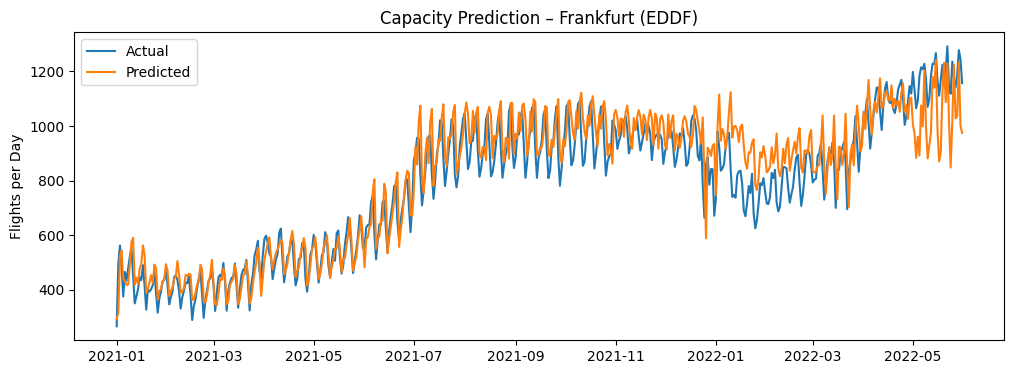

EDDM (516, 4)


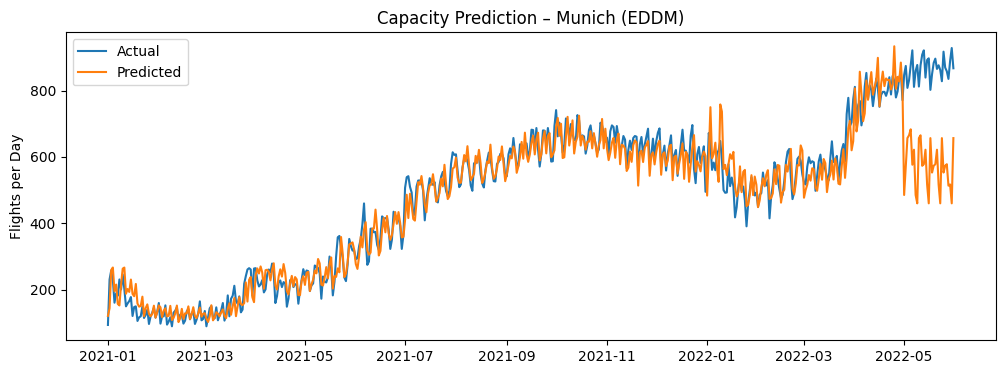

EDDL (516, 4)


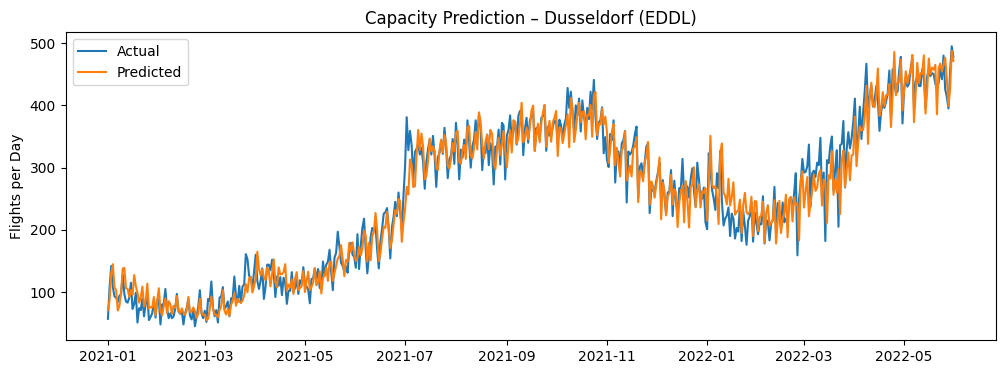

EDDT (0, 4)
Skipping EDDT (no test data).
EDDK (516, 4)


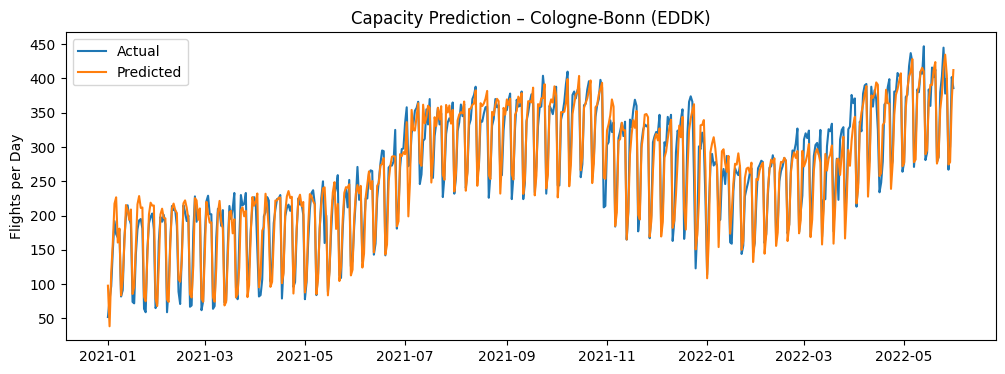

EDDH (516, 4)


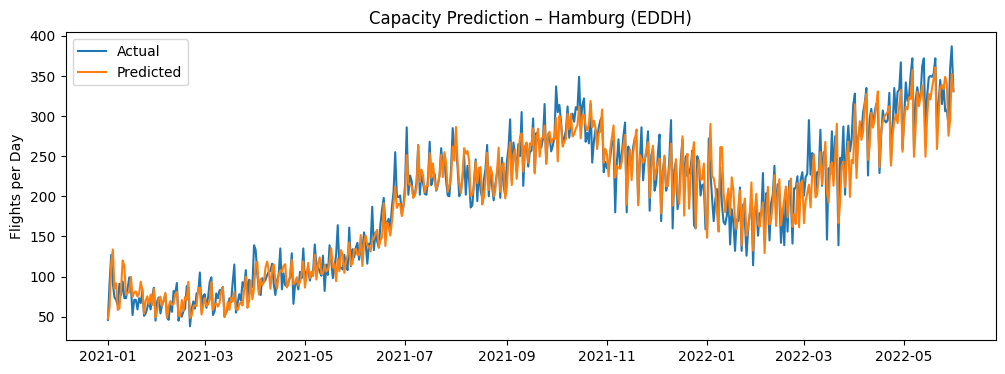

EDDS (516, 4)


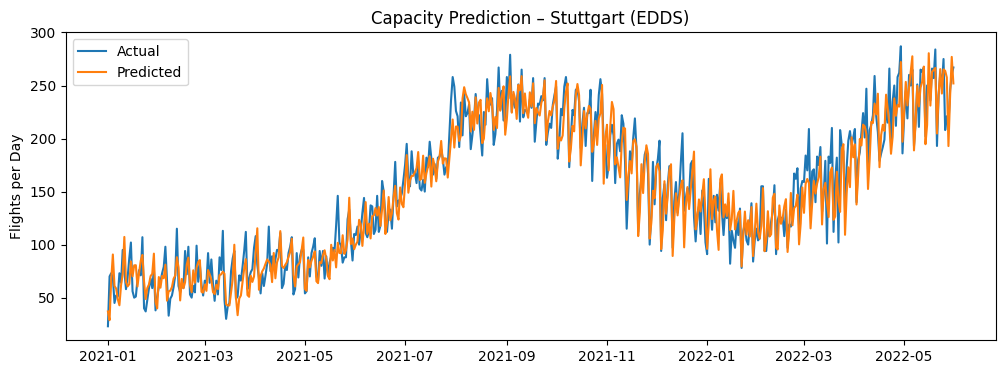

EDDB (516, 4)


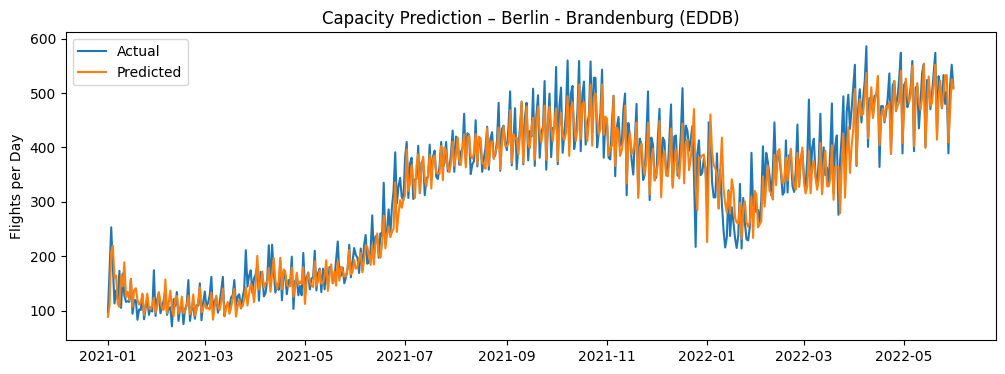

EDDP (516, 4)


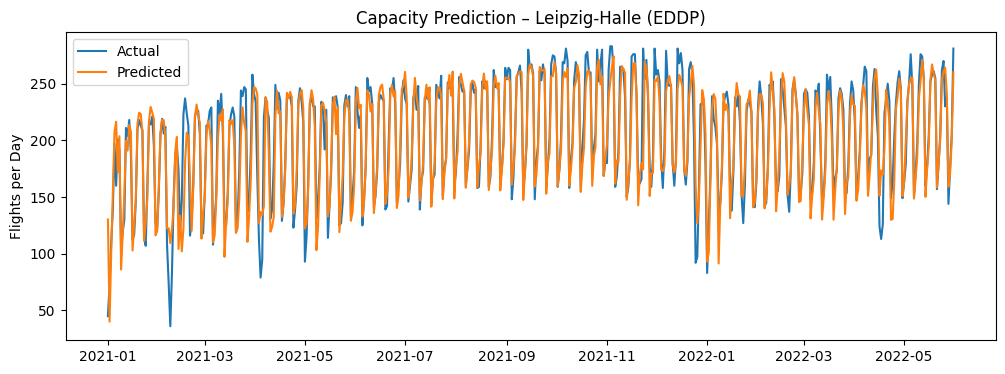

EDDV (516, 4)


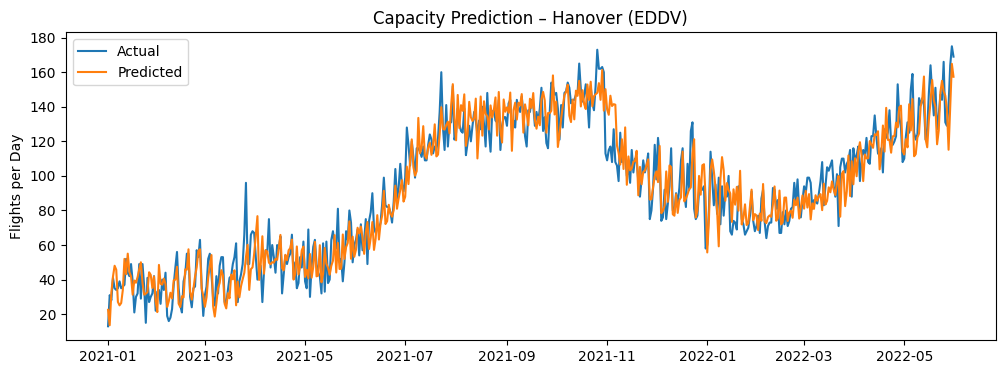

EDDN (516, 4)


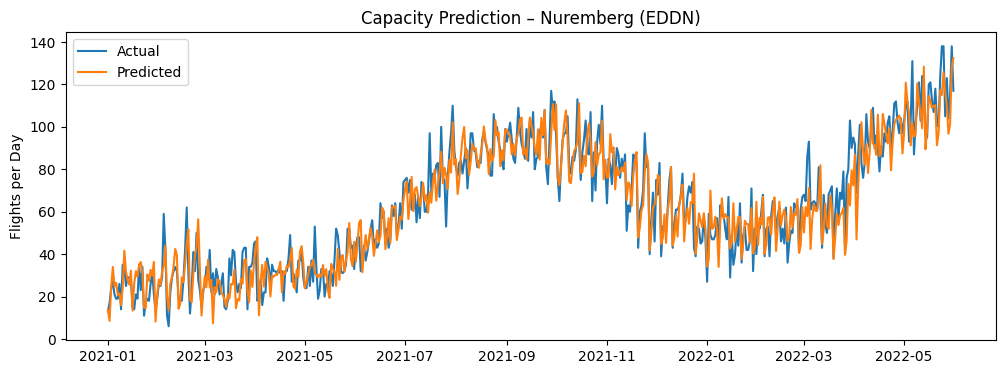

EDDW (516, 4)


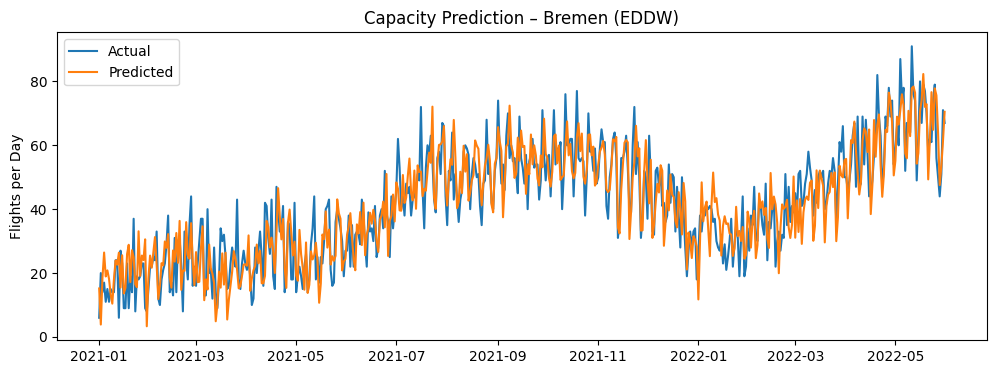

EDDC (514, 4)


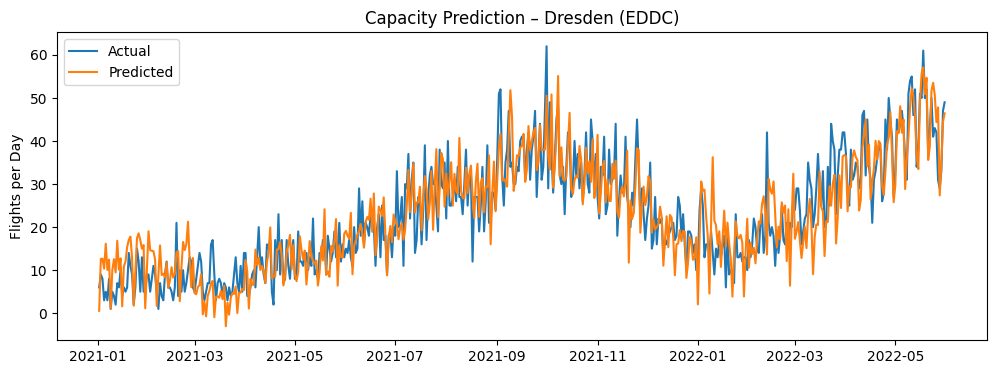

EDDG (516, 4)


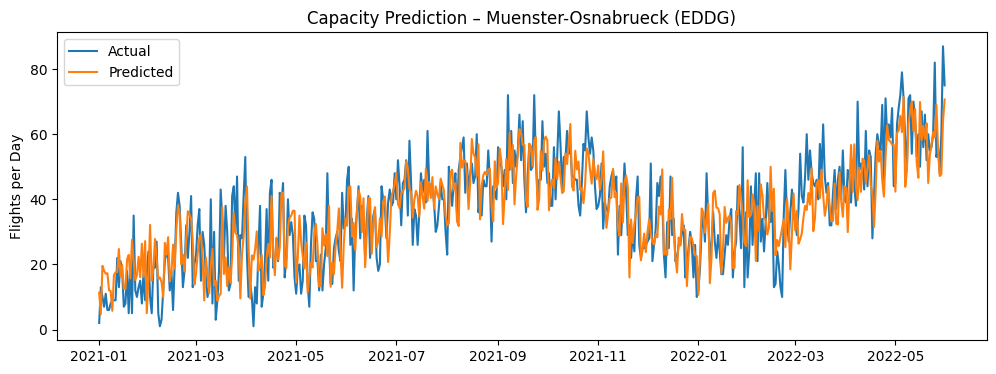

EDDR (501, 4)


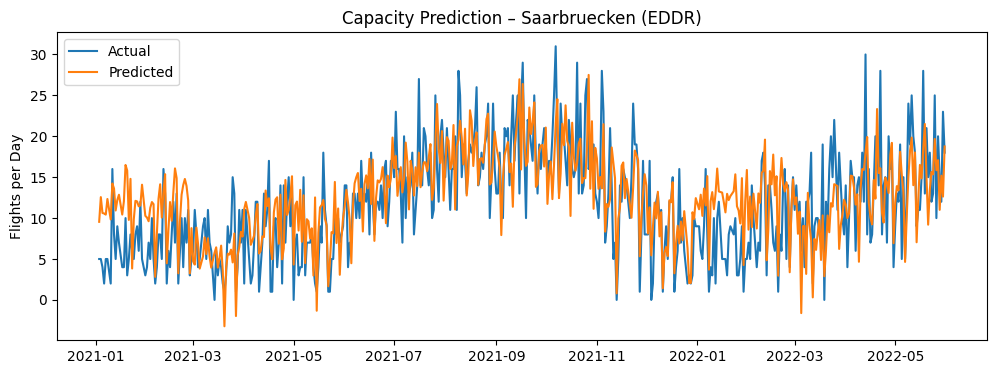

In [237]:
for ap_tuple in top_de_airports:
    icao = ap_tuple[0]  # ('EDDF','Frankfurt') → 'EDDF'

    temp = pred_de[pred_de["Airport"] == icao].sort_values("Date")
    print(icao, temp.shape)

    if temp.empty:
        print(f"Skipping {icao} (no test data).")
        continue

    plt.figure(figsize=(12,4))
    plt.plot(temp["Date"], temp["Actual"], label="Actual")
    plt.plot(temp["Date"], temp["Predicted"], label="Predicted")
    plt.title(f"Capacity Prediction – {ap_tuple[1]} ({icao})")
    plt.ylabel("Flights per Day")
    plt.legend()
    plt.show()


In [271]:
airport_scores = []

for ap_tuple in top_de_airports:
    icao = ap_tuple[0]
    temp = pred_de[pred_de["Airport"] == icao]

    if temp.empty:
        continue

    mae = mean_absolute_error(temp["Actual"], temp["Predicted"])
    mse = mean_squared_error(temp["Actual"], temp["Predicted"])
    rmse = np.sqrt(mse)

    airport_scores.append([icao, ap_tuple[1], mae, rmse])

import pandas as pd
airport_scores_df = pd.DataFrame(airport_scores, columns=["ICAO", "Airport", "MAE", "RMSE"])
airport_scores_df.sort_values("MAE")

,ICAO,Airport,MAE,RMSE
13,EDDR,Saarbruecken,3.926410,4.938991
11,EDDC,Dresden,5.147595,6.472912
10,EDDW,Bremen,6.773041,8.432230
9,EDDN,Nuremberg,7.871016,10.099897
12,EDDG,Muenster-Osnabrueck,8.434772,10.605597
8,EDDV,Hanover,9.802640,12.570131
7,EDDP,Leipzig-Halle,12.865151,18.818723
5,EDDS,Stuttgart,14.210316,18.381700
4,EDDH,Hamburg,15.464313,20.610668
3,EDDK,Cologne-Bonn,17.676420,23.367052


In [272]:
importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).head(20)


,0
APT_ICAO_EHAM,0.105812
APT_ICAO_LFPG,0.100095
APT_ICAO_EDDF,0.095469
APT_ICAO_EGLL,0.094092
APT_ICAO_EDDM,0.067356
APT_ICAO_LEMD,0.065675
APT_ICAO_LTBA,0.034827
APT_ICAO_LEBL,0.028304
APT_ICAO_ENBR,0.025468
APT_ICAO_LIRF,0.023207


In [273]:
ap = "EDDF"

last = df_top_de[df_top_de["APT_ICAO"] == ap].sort_values("FLT_DATE").iloc[-1]
next_date = last["FLT_DATE"] + pd.Timedelta(days=1)

future_input = pd.DataFrame({
    "YEAR": [next_date.year],
    "MONTH": [next_date.month],
    "DAYOFWEEK": [next_date.dayofweek],
    "IS_WEEKEND": [1 if next_date.dayofweek in [5,6] else 0],
    "IFR_ratio": [last["IFR_ratio"]],
    "lag_1": [last["FLT_TOT_1"]],
    "lag_7": [last["lag_7"]],
    "lag_30": [last["lag_30"]],
    "APT_ICAO": [ap],
    "APT_NAME": [last["APT_NAME"]]
})

future_encoded = pd.get_dummies(future_input).reindex(columns=X_train.columns, fill_value=0)
future_pred = xgb.predict(future_encoded)[0]
print(f"Predicted traffic for {ap} on {next_date.date()}: {future_pred:.0f}")


Predicted traffic for EDDF on 2022-06-01: 214
